In [1]:
%matplotlib inline

This builds on the official [Learn the Basics](https://pytorch.org/tutorials/beginner/basics/intro.html) tutorial for PyTorch.

# Quickstart

This section runs through the API for common tasks in machine learning. Refer to the links in each section to dive deeper. 


## Working with data

PyTorch has two [primitives to work with data](https://pytorch.org/docs/stable/data.html):
``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset``.

Note that we use a standard sample dataset which is distributed with the library. For real applications you will have to find other ways to define your ``Dataset`` objects.



In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)
print(torch.cuda.device_count())
#print(torch.cuda.get_device_name(0))

False
True
0


PyTorch offers domain-specific libraries such as [TorchText](https://pytorch.org/text/stable/index.html),
[TorchVision](https://pytorch.org/vision/stable/index.html), and [TorchAudio](https://pytorch.org/audio/stable/index.html),
all of which include datasets. For this tutorial, we  will be using a TorchVision dataset.

The ``torchvision.datasets`` module contains ``Dataset`` objects for many real-world vision data like
CIFAR, COCO ([full list here](https://pytorch.org/vision/stable/datasets.html)). In this tutorial, we
use the FashionMNIST dataset. Every TorchVision ``Dataset`` includes two arguments: ``transform`` and
``target_transform`` to modify the samples and labels respectively.



In [4]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

We pass the ``Dataset`` as an argument to ``DataLoader``. This wraps an iterable over our dataset, and supports
automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element
in the dataloader iterable will return a batch of 64 features and labels.



In [6]:
batch_size = 32 #number of images 

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size) # dataloader manage the batch size
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([32, 1, 28, 28])
Shape of y: torch.Size([32]) torch.int64


Read more about [loading data in PyTorch](data_tutorial.html).




### Exercise: Inspecting the Data

1. Note that the `DataSet` objects work like lists, so that you can index a single element.
   What does the first data point look like?
2. When you look at a datapoint, it should contain an image and a class label.  Can you find these elements of a given data item?
3. Show the image (see below).
3. Are the `DataLoader` subscriptable? (I.e. what does `test_dataloader[0]` mean?)
4. We shall see later that `DataLoader` objects are iterable, so you can make a for loop to look at all the elements.

Showing an image is a little tricky, because PyTorch organises the dimensions differently from numpy, but assuming you have extracted an image `imtensor` from the dataset, you can view it like this:

```
import matplotlib.pyplot as plt
plt.imshow(  imtensor.permute(1, 2, 0)  )
```

The `permute()` call reorganises the dimensions.


In [7]:
print(test_data[0][0].shape, test_data[0][0].permute(1, 2, 0).shape)
print(test_data[10000-1][0].shape)
print(training_data[60000-1][0].shape)

torch.Size([1, 28, 28]) torch.Size([28, 28, 1])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


--------------




## Creating Models
To define a neural network in PyTorch, we create a class that inherits
from [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). We define the layers of the network
in the ``__init__`` function and specify how data will pass through the network in the ``forward`` function. To accelerate
operations in the neural network, we move it to the GPU if available.



In [13]:
# Get cpu or gpu device for training.
#device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.02),  # activation function
            nn.Linear(512, 512),  #linear function
            nn.LeakyReLU(0.02),  # activation func
            nn.Linear(512, 10) # linear Func     # 10 outputs 512 neurons  # 3 layer neural network
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)



"""class NeuralNetwork1(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),  # activation function
            nn.Linear(512, 512),  #linear function
            nn.ReLU(),  # activation func
            nn.Linear(512, 10) # linear Func     # 10 outputs 512 neurons  # 3 layer neural network
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model1 = NeuralNetwork1().to(device)
print(model1)"""

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.02)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.02)
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


'class NeuralNetwork1(nn.Module):\n    def __init__(self):\n        super().__init__()\n        self.flatten = nn.Flatten()\n        self.linear_relu_stack = nn.Sequential(\n            nn.Linear(28*28, 512),\n            nn.ReLU(),  # activation function\n            nn.Linear(512, 512),  #linear function\n            nn.ReLU(),  # activation func\n            nn.Linear(512, 10) # linear Func     # 10 outputs 512 neurons  # 3 layer neural network\n        )\n\n    def forward(self, x):\n        x = self.flatten(x)\n        logits = self.linear_relu_stack(x)\n        return logits\n\nmodel1 = NeuralNetwork1().to(device)\nprint(model1)'

Note how the network is built up. It has three layers; `Linear` means the layer is fully connected.  Between the layers, the ReLu function is used as activation function.  Note how the input is flattened in the `forward()` method.  The input is a $28\times28$ image but the network takes a $1\times784$ vector.

Read more about [building neural networks in PyTorch](buildmodel_tutorial.html).




--------------




## Optimizing the Model Parameters
To train a model, we need a [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions)
and an [optimizer](https://pytorch.org/docs/stable/optim.html).



In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum = 0.9)

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and
backpropagates the prediction error to adjust the model's parameters.



In [10]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)          #(1) Prediction
        loss = loss_fn(pred, y)  #(2) Loss

        # Backpropagation
        optimizer.zero_grad()    #(3) Optimisation
        loss.backward() 
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

**Exercise**  Identify the main steps of the training in the function above. (1) Prediction.  (2) Loss.  (3) Optimisation.  Use a search engine to make sense of the different lines of the code.

The `model.train()` line may be confusing.  It does, in fact, not train the model.  Instead it sets the model in training state, so that it is open to updating weights.  Compare it to `model.eval()` below.

We also check the model's performance against the test dataset to ensure it is learning.



In [11]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)                          #(1) Prediction
            test_loss += loss_fn(pred, y).item()     #(2) Loss
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()       # test error
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    

The training process is conducted over several iterations (*epochs*). During each epoch, the model learns
parameters to make better predictions. We print the model's accuracy and loss at each epoch; we'd like to see the
accuracy increase and the loss decrease with every epoch.

**Exercise**  Identify the main steps of the testing in the function above. (1) Prediction.  (2) Loss. How is the test error calculated?  Use a search engine to make sense of the different lines of the code.



In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n small model-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
    print("Traind data")
    test(train_dataloader, model, loss_fn)
    """print("bigger model---------------------------")
    train(train_dataloader, model1, loss_fn, optimizer)
    test(test_dataloader, model1, loss_fn)
    print("Traind data")
    test(train_dataloader, model1, loss_fn)"""
print("Done!")

Epoch 1
 small model-------------------------------
loss: 2.302452  [    0/60000]
loss: 2.302322  [ 3200/60000]
loss: 2.299902  [ 6400/60000]
loss: 2.316616  [ 9600/60000]
loss: 2.300917  [12800/60000]
loss: 2.299175  [16000/60000]
loss: 2.305982  [19200/60000]
loss: 2.308005  [22400/60000]
loss: 2.301874  [25600/60000]
loss: 2.302089  [28800/60000]


Read more about [Training your model](optimization_tutorial.html).




--------------




## Saving Models
A common way to save a model is to serialize the internal state dictionary (containing the model parameters).



In [14]:
torch.save(model.state_dict(), "model 5epo LR-2 32bch LReLu.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


## Loading Models

The process for loading a model includes re-creating the model structure and loading
the state dictionary into it.



In [1]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model 5epo default.pth"))
model1 = NeuralNetwork()
model1.load_state_dict(torch.load("model 5epo LR-2.pth"))
model2 = NeuralNetwork()
model2.load_state_dict(torch.load("model 5epo LR-2 32bch.pth"))
model3 = NeuralNetwork1()
model3.load_state_dict(torch.load("model 5epo LR-2 32bch LReLu.pth"))

NameError: name 'NeuralNetwork' is not defined

In [18]:
test(train_dataloader, model, loss_fn)
test(train_dataloader, model1, loss_fn)
test(train_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 70.0%, Avg loss: 0.845494 

Test Error: 
 Accuracy: 82.7%, Avg loss: 0.487896 

Test Error: 
 Accuracy: 85.6%, Avg loss: 0.412290 



This model can now be used to make predictions.



In [22]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
test = 0
"""import matplotlib.pyplot as plt
plt.imshow(  test_data[test][0].permute(1, 2, 0)  )"""

model.eval()
x, y = test_data[test][0], test_data[test][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


Read more about [Saving & Loading your model](saveloadrun_tutorial.html).




In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def confusion_matric(model):
    y_pred = []
    y_true = []

    # iterate over test data
    for inputs, labels in test_dataloader:
            output = model(inputs) # Feed Network

            output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
            y_pred.extend(output) # Save Prediction

            labels = labels.data.cpu().numpy()
            y_true.extend(labels) # Save Truth

    # constant for classes
    classes = (
        "T-shirt/top",
        "Trouser",
        "Pullover",
        "Dress",
        "Coat",
        "Sandal",
        "Shirt",
        "Sneaker",
        "Bag",
        "Ankle boot",
    )

    # Build confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                         columns = [i for i in classes])
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cm, annot=True)
    plt.savefig('output.png')
    return df_cm

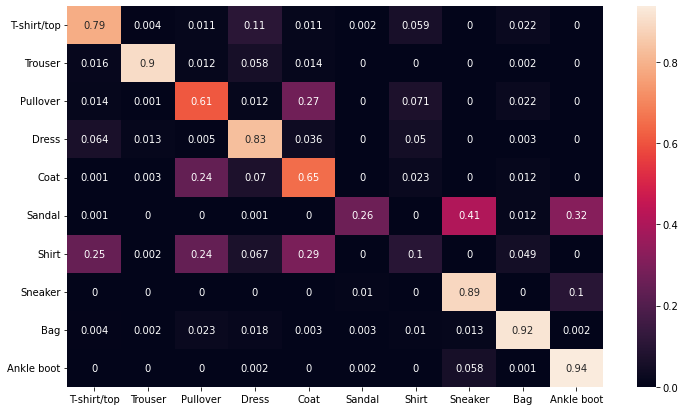

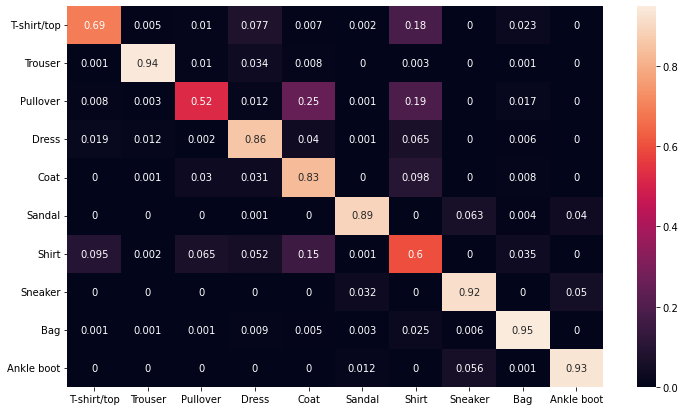

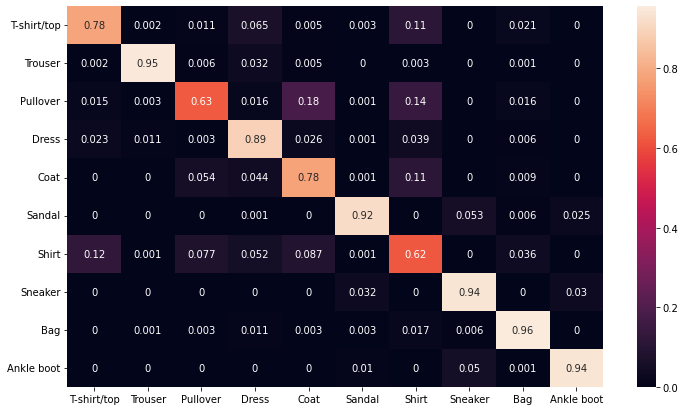

In [21]:
modelarray = confusion_matric(model)
modelarray1 = confusion_matric(model1)
modelarray2 = confusion_matric(model2)